**NLP**:

Natural language processing is the processing of languages used in the system that exists in the library of nltk where this is processed to cut, extract and transform to new data so that we get good insights into it. It uses only the languages that exist in the library because NLP-related things exist there itself so it cannot understand the things beyond what is present in it.

**Problem statement:**

Perform topic modelling and text summarization on the given text data hint use NLP-TM text file.

Business Objectives: Perform Topic Modelling and summarization.

STEPS:

Concatenate all the text you have in the source document as one solid block of text.

We provide conditions that define a sentence such as looking for punctuation marks such as period (.), question mark (?), and an exclamation mark (!). Once we have this definition, we simply split the text document into sentences.

Now that we have access to separate sentences, we find vector representations (word embeddings) of each of those sentences.

Once we have the vector representation for our words, we have to extend the process to represent entire sentences as vectors.

we have a matrix populated with the cosine similarities between the sentences.

And at last we can convert this matrix into a graph wherein the nodes represent the sentences, and the edges represent the similarity between the sentences.

In [ ]:

# let us first import the libraries to perform text summarization
import nltk
nltk.download('stopwords')

from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from heapq import nlargest

STOPWORDS = set(stopwords.words('english') + list(punctuation))
MIN_WORD_PROP, MAX_WORD_PROP = 0.1, 0.9

# now define a function to count frequnecies leaving the stopwords
def compute_word_frequencies(word_sentences):
    words = [word for sentence in word_sentences 
                     for word in sentence 
                         if word not in STOPWORDS]
    counter = Counter(words)
    limit = float(max(counter.values()))
    word_frequencies = {word: freq/limit 
                                for word,freq in counter.items()}
    # Drop words if too common or too uncommon
    word_frequencies = {word: freq 
                            for word,freq in word_frequencies.items() 
                                if freq > MIN_WORD_PROP 
                                and freq < MAX_WORD_PROP}
    return word_frequencies


# defining a function to get scores of sentence
def sentence_score(word_sentence, word_frequencies):
    return sum([ word_frequencies.get(word,0) 
                    for word in word_sentence])

    
###
def summarize(text:str, num_sentences=3):
    """
    Summarize the text, by return the most relevant sentences
     :text the text to summarize
     :num_sentences the number of sentences to return
    """"
    
    text = text.lower() # Make the text lowercase
    
    sentences = sent_tokenize(text) # Break text into sentences 
    
    # Break sentences into words
    word_sentences = [word_tokenize(sentence) for sentence in sentences]
    
    # Compute the word frequencies
    word_frequencies = compute_word_frequencies(word_sentences)
    
    # Calculate the scores for each of the sentences
    scores = [sentence_score(word_sentence, word_frequencies) for word_sentence in word_sentences]
    sentence_scores = list(zip(sentences, scores))
    
    # Rank the sentences
    top_sentence_scores = nlargest(num_sentences, sentence_scores, key=lambda t: t[1])
    
    # Return the top sentences
    return [t[0] for t in top_sentence_scores]

 
# we open out file using utf8 encoding   
with open('F:/NLP-TM.txt', 'r',  encoding="utf8") as file:
    txt = file.read()

txt

len(sent_tokenize(txt))

summarize(txt)

# now e import pandas
import pandas as pd

# we capture each sentence upto 20 and append it to empty lit
txt_list = []
for i in range(0,20):
    j = summarize(txt, num_sentences=20)[i]
    txt_list.append(j)

# we form a series object from the above txt_list
txt_df = pd.Series(txt_list) 
   
# LDA
from gensim.parsing.preprocessing import preprocess_string

txt_df = txt_df.apply(preprocess_string).tolist()

from gensim import corpora
import gensim

dictionary = corpora.dictionary.Dictionary(txt_df)
corpus = [dictionary.doc2bow(text) for text in txt_df]

# creating LdaModel class object using corpus dataset
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=10)

ldamodel.print_topics(num_words=5)

from gensim.models.coherencemodel import CoherenceModel

# we define a function to get the coherence scores
def calculate_coherence_score(documents, dictionary, model):
    coherence_model = CoherenceModel(model=model, texts=documents, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# now we define a function to get coherence values using the coherence_scores function we defined above
def get_coherence_values(start, stop):
    for num_topics in range(start, stop):
        print(f'\nCalculating coherence for {num_topics} topics')
        ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = num_topics, id2word=dictionary, passes=2)
        coherence = calculate_coherence_score(txt_df, dictionary, ldamodel)
        yield coherence

# now we calculate coherence scores from 10 topics to 16 topics using the function we defined above
min_topics, max_topics = 10,16
coherence_scores = list(get_coherence_values(min_topics, max_topics))

# now we have to visulaize our results for which we import matplotlib 
import matplotlib.pyplot as plt

x = [int(i) for i in range(min_topics, max_topics)]

ax = plt.figure(figsize=(10,8))
plt.xticks(x)
plt.plot(x, coherence_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Value')
plt.title('Coherence Scores', fontsize=10); plt.show()



We got the graph wherein the nodes represent the sentences, and the edges represent the similarity between the sentences.

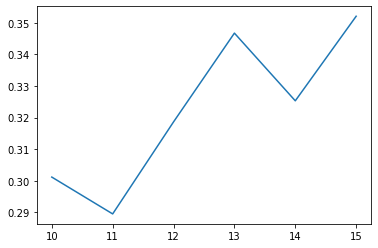

Result: As we can see that coherence values rise and fall for every alternate number of topics from the plots. 10 has the minimum coherence value below 0.25 and 15 has max just above 0.70. Hence the coherence scores will change each time we run the function.
